In [98]:
# pip install numpy
# pip install pandas
# pip install matplotlib
# pip install seaborn
# install these lib first of all through your cmd prmopt.

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
#Dataset calling
df = pd.read_csv("Expanded_data_with_more_features.csv")

In [101]:
print (df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [102]:
df.describe()
# describes the data with values in the columns

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [103]:
df.info() 
# tells about what all data types is there in the coulums  also tells about not null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [104]:
# how many values are null
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

# Drop unnames Column Basically Delete

In [105]:
df = df.drop("Unnamed: 0" , axis = 1)
print(df.head)

<bound method NDFrame.head of        Gender EthnicGroup          ParentEduc     LunchType   TestPrep  \
0      female         NaN   bachelor's degree      standard       none   
1      female     group C        some college      standard        NaN   
2      female     group B     master's degree      standard       none   
3        male     group A  associate's degree  free/reduced       none   
4        male     group C        some college      standard       none   
...       ...         ...                 ...           ...        ...   
30636  female     group D         high school      standard       none   
30637    male     group E         high school      standard       none   
30638  female         NaN         high school  free/reduced  completed   
30639  female     group D  associate's degree      standard  completed   
30640    male     group B        some college      standard       none   

      ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
0            

In [106]:
# so til now we have learned, what kind of data is there
# Now we will transform data.

# Change weekly study hours coulmn to the desired

In [107]:
df["WklyStudyHours"] = df["WklyStudyHours"].str.replace("5-Oct","5-10")
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


# Gender Distribution

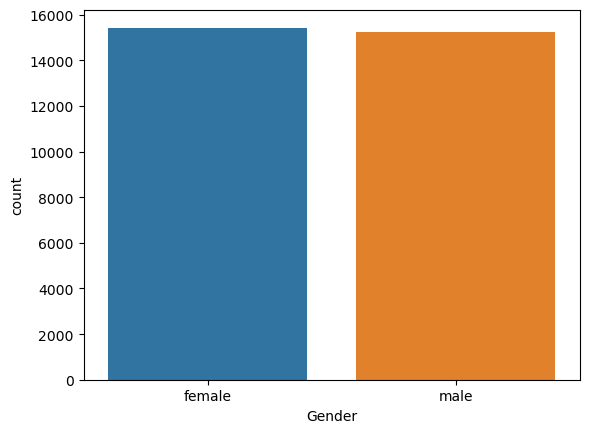

In [108]:
# count plot
sns.countplot(data = df, x = "Gender")
plt.show()

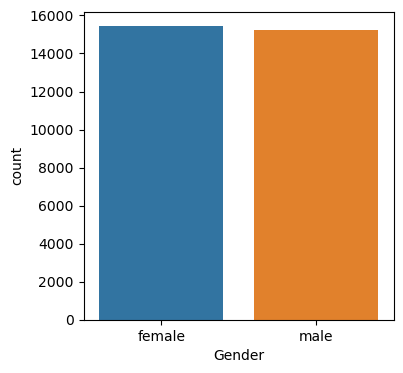

In [109]:
# count plot - with fixed size
plt.figure(figsize= (4,4))
sns.countplot(data = df, x = "Gender")
plt.show()

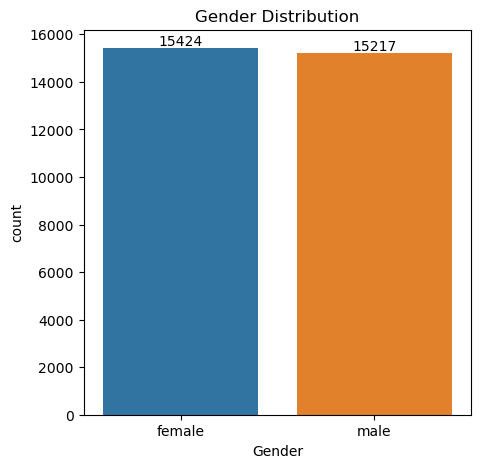

In [110]:
# as the values are nearly the same so we will add legends to it with values
plt.figure(figsize= (5,5))
ax = sns.countplot(data = df, x = "Gender")
ax.bar_label(ax.containers[0])
plt.title("Gender Distribution")
plt.show()

In [111]:
# from the above chart we have analysed that:
## the number of females in the data is more than the number of males

# Parent Education impact on different courses

In [112]:
gb = df.groupby("ParentEduc").agg({"MathScore":'mean' , "ReadingScore":'mean' , "WritingScore":'mean' })
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


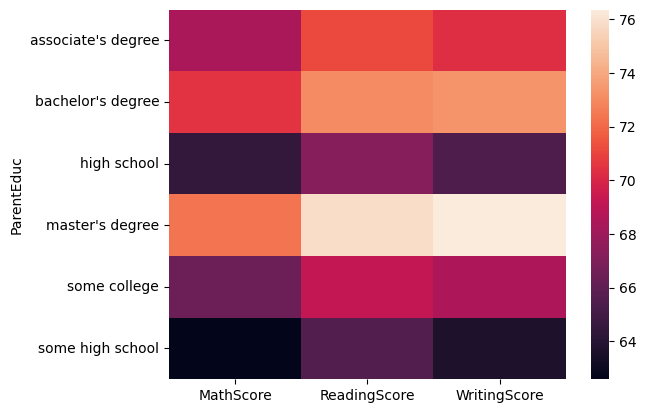

In [113]:
sns.heatmap(gb)
plt.show()

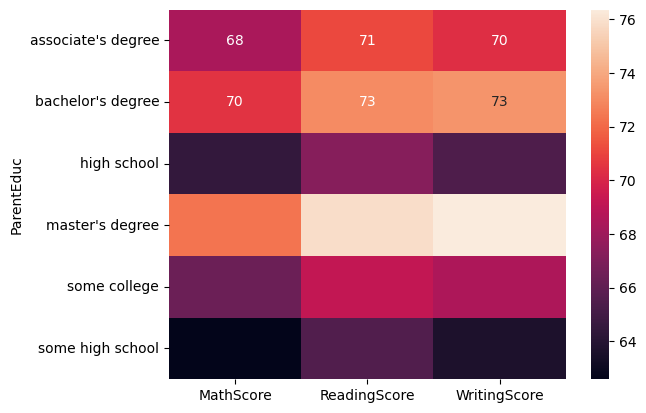

In [114]:
sns.heatmap(gb, annot = True)
plt.show()

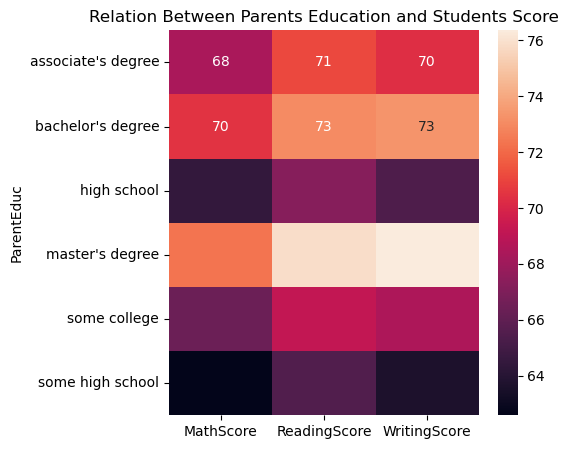

In [115]:
plt.figure(figsize= (5,5))
sns.heatmap(gb, annot = True)
plt.title("Relation Between Parents Education and Students Score")
plt.show()

In [116]:
# from the above chart we have concluded 
# that the education of the parents have a good impact 
# on the childs score.

# Relation Between Marital Status and Students Score

In [117]:
gb1 = df.groupby("ParentMaritalStatus").agg({"MathScore":'mean' , "ReadingScore":'mean' , "WritingScore":'mean' })
print(gb1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


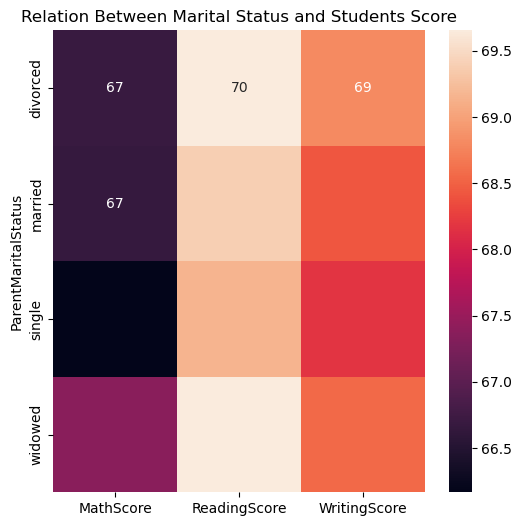

In [118]:
plt.figure(figsize= (6,6))
sns.heatmap(gb1, annot = True)
plt.title("Relation Between Marital Status and Students Score")
plt.show()

In [119]:
# there is no such difference 

# Now to check Scores

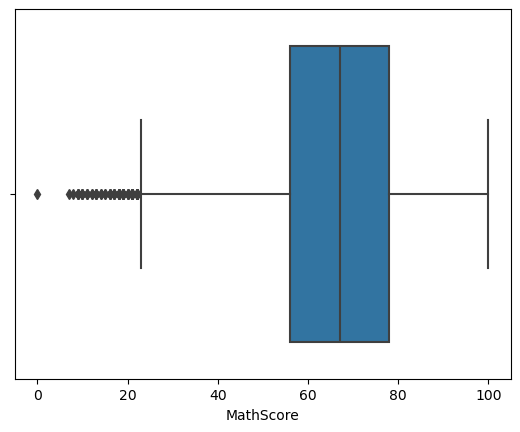

In [120]:
sns.boxplot(data =  df, x = "MathScore" )
plt.show()

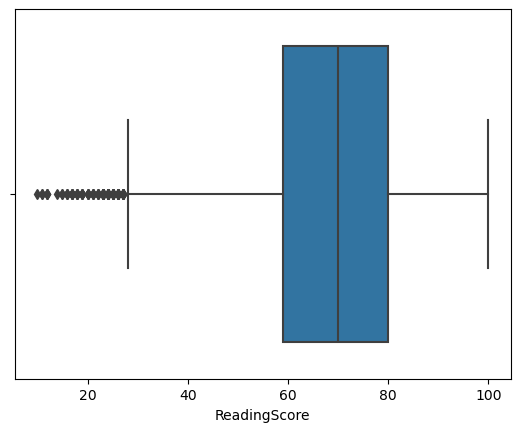

In [121]:
sns.boxplot(data =  df, x = "ReadingScore" )
plt.show()

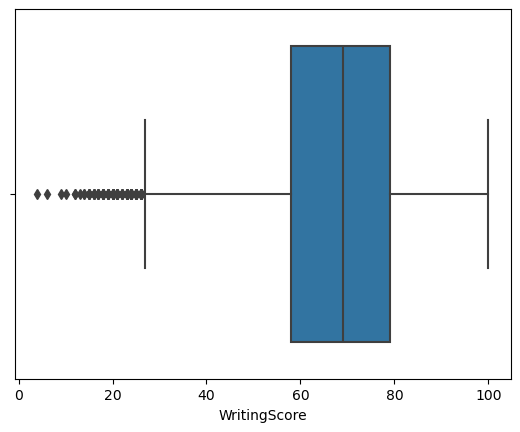

In [122]:
sns.boxplot(data =  df, x = "WritingScore" )
plt.show()

# Distribution For Ethnic Groups

In [123]:
# First we find all the unique Values
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


In [124]:
#Percentage - First of pie chart
groupA = df.loc[(df['EthnicGroup'] == "group A" )].count()
print(groupA)

Gender                 2219
EthnicGroup            2219
ParentEduc             2078
LunchType              2219
TestPrep               2081
ParentMaritalStatus    2121
PracticeSport          2167
IsFirstChild           2168
NrSiblings             2096
TransportMeans         1999
WklyStudyHours         2146
MathScore              2219
ReadingScore           2219
WritingScore           2219
dtype: int64


In [125]:
 #if you want to check what all data is checked then remove the paranthesis
groupA = df.loc[(df['EthnicGroup'] == "group A" )].count
print(groupA)

<bound method DataFrame.count of        Gender EthnicGroup          ParentEduc     LunchType   TestPrep  \
3        male     group A  associate's degree  free/reduced       none   
13       male     group A        some college      standard  completed   
14     female     group A     master's degree      standard       none   
25       male     group A     master's degree  free/reduced       none   
56       male     group A    some high school  free/reduced       none   
...       ...         ...                 ...           ...        ...   
30603    male     group A         high school      standard       none   
30621  female     group A   bachelor's degree      standard       none   
30622    male     group A  associate's degree  free/reduced  completed   
30627  female     group A         high school      standard  completed   
30634    male     group A  associate's degree  free/reduced  completed   

      ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
3         

[2219, 5826, 9212, 7503, 4041]


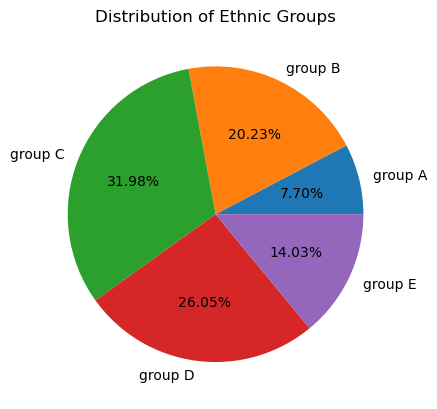

In [144]:
# Now the pie chart
groupA = df.loc[(df['EthnicGroup'] == "group A" )].count()
groupB = df.loc[(df['EthnicGroup'] == "group B" )].count()
groupC = df.loc[(df['EthnicGroup'] == "group C" )].count()
groupD = df.loc[(df['EthnicGroup'] == "group D" )].count()
groupE = df.loc[(df['EthnicGroup'] == "group E" )].count()

l = ["group A", "group B", "group C", "group D" , "group E"]
mlist = [groupA["EthnicGroup"], groupB["EthnicGroup"],groupC["EthnicGroup"],groupD["EthnicGroup"],groupE["EthnicGroup"] ]
print(mlist)
plt.pie(mlist, labels = l, autopct = "%1.2f%%")
plt.title("Distribution of Ethnic Groups")
plt.show()

[Text(0, 0, '9212'),
 Text(0, 0, '5826'),
 Text(0, 0, '2219'),
 Text(0, 0, '7503'),
 Text(0, 0, '4041')]

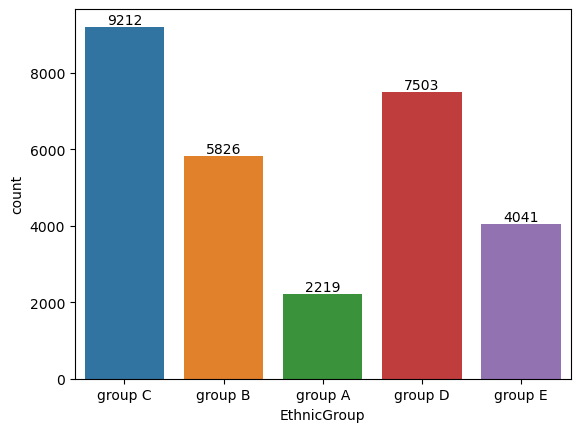

In [143]:
# how to check values are correct or not
ax = sns.countplot(data = df, x = 'EthnicGroup')
ax.bar_label(ax.containers[0])